In [1]:
import numpy as np
from scipy.optimize import fsolve
import math
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
from scipy.optimize import minimize, fsolve
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')

In [2]:
def LP_payoff(f,E,Q, alpha=1):
    fee = 2*alpha* f * V * E *Q/(E-Q) - E*eta
    return fee

def NT_cost(f, E,Q):
    return (1 + f) * E * V * Q / (E - Q)+g

def frange(start, stop, step):
    while start <= stop:
        yield start
        start += step
        
# Function to extract the (f, E) coordinates along the payoff=0 contour
def get_zero_payoff_points(Z_payoff, F, E):
    contour = plt.contour(E, F, Z_payoff, levels=[0])
    contour_paths = contour.collections[0].get_paths()
    payoff_zero_points = contour_paths[0].vertices
    return payoff_zero_points[:, 1], payoff_zero_points[:, 0]  # f, E

# Function to find the minimum NT_cost along the payoff=0 contour
def find_minimum_cost(f_points, E_points, Z_cost):
    min_cost = float('inf')
    min_point = None
    for i in range(len(f_points)):
        f_idx = np.abs(f_values - f_points[i]).argmin()
        E_idx = np.abs(E_values - E_points[i]).argmin()
        cost = Z_cost[E_idx, f_idx]
        if cost < min_cost:
            min_cost = cost
            min_point = (f_points[i], E_points[i])  # (f, E)
    return min_cost, min_point

def total_payoff_two(f,E,Q1,Q2, alpha1,alpha2):
    # alpha is the probability that NT is low type (Q1<Q2), alpha>0.5
    return 2*alpha1* f * V * E *Q1/(E-Q1) + 2*alpha2* f * V * E *Q2/(E-Q2) - E*eta

In [3]:
#parameter chosen
V = 1
alpha =1 
eta = 0.01
g = 0.05

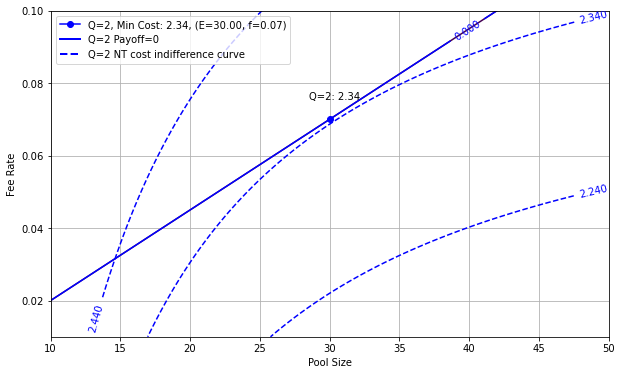

In [4]:
# Plot the results
plt.figure(figsize=(10, 6))

q_test = 2
f_values = np.linspace(0.01, 0.1, 400)  # f from 0.01 to 5
E_values = np.linspace(10, 50, 400)   

# Create a meshgrid
F, E = np.meshgrid(f_values, E_values)
Z1_payoff = LP_payoff(F, E, q_test)  # Payoff function based on q_test
Z1_cost = NT_cost(F, E, q_test)  # Cost function based on q_test

# Extract zero payoff points for the Q value
f1_zero, E1_zero = get_zero_payoff_points(Z1_payoff, F, E)

# Find and mark the minimum NT_cost for Q value
min_cost1, min_point1 = find_minimum_cost(f1_zero, E1_zero, Z1_cost)


# Mark the minimum NT_cost point with annotation
plt.plot(min_point1[1], min_point1[0], 'bo', label=f'Min NT_cost (Q={q_test}) = {min_cost1:.2f}')
plt.annotate(f'Q={q_test}: {min_cost1:.2f}', (min_point1[1], min_point1[0]), 
             textcoords="offset points", xytext=(5, 20), ha='center')

# Define the levels for the NT_cost indifference curves around the minimum cost
step = 0.1
start = min_cost1 - step
end = min_cost1 + step
levels_values = [round(x, 2) for x in frange(start, end, step)]

# Plot total payoff contours where total payoff is zero
contour1_payoff = plt.contour(E, F, Z1_payoff, levels=[0], colors='blue')  # Q = 1, Payoff = 0
plt.clabel(contour1_payoff, inline=1, fontsize=10)

# Plot NT_cost indifference curves with different line styles
contour1_cost = plt.contour(E, F, Z1_cost, levels=levels_values, colors='blue', linestyles='--')
plt.clabel(contour1_cost, inline=1, fontsize=10)

# Add labels and title
plt.xlabel('Pool Size')
plt.ylabel('Fee Rate')
#plt.title('ZeroPayoff and NT_cost Indifference Curves')
plt.grid(True)

# Create proxy artists for the legend (solid for payoff, dashed for NT_cost)
legend_lines = [
    Line2D([0], [0], color='blue', marker='o', label=f'Q={q_test}, Min Cost: {min_cost1:.2f}, (E={min_point1[1]:.2f}, f={min_point1[0]:.2f})'),
    Line2D([0], [0], color='blue', lw=2, label=f'Q={q_test} Payoff=0'),
    Line2D([0], [0], color='blue', lw=2, linestyle='--', label=f'Q={q_test} NT cost indifference curve')
]

# Add the legend
plt.legend(handles=legend_lines, loc='upper left')

# Show the plot
plt.show()

In [5]:
def f_star(Q,alpha):
    return np.sqrt(eta/(2*alpha*V))

def E_star(Q,alpha):
    return (np.sqrt(2*alpha*V/eta)+1)*Q

def pi_F(Q,c,alpha=1):
    f = f_star(Q,alpha)
    E = E_star(Q,alpha)
    Q_w = c*Q
    # First term: (1-f) * E * Q_w / [(E - Q_w - Q)(E - Q)]
    term1 = (1 - f) * E * Q_w / ((E - Q_w - Q) * (E - Q))
    # Second term: (1+f) * Q_w / (E - Q_w)
    term2 = (1 + f) * Q_w / (E - Q_w)
    # Compute the full expression: term1 - term2
    result = E*V*(term1 - term2)-2*g
    
    return result

def exgo_pi_F(f,E,Q,W):
    Q_w = W
    # First term: (1-f) * E * Q_w / [(E - Q_w - Q)(E - Q)]
    term1 = (1 - f) * E * Q_w / ((E - Q_w - Q) * (E - Q))
    # Second term: (1+f) * Q_w / (E - Q_w)
    term2 = (1 + f) * Q_w / (E - Q_w)
    # Compute the full expression: term1 - term2
    result = E*V*(term1 - term2)-2*g
    
    return result

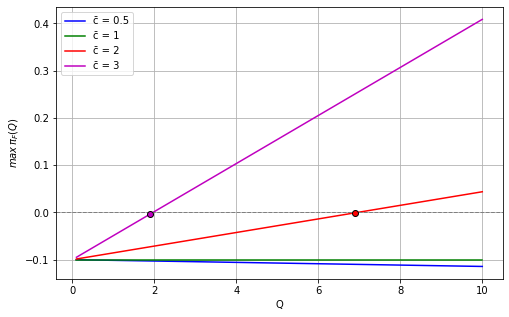

In [6]:
Q_values = np.linspace(0.1, 10, 100)
# Plot
plt.figure(figsize=(8, 5))
c_bar_values = [0.5, 1, 2, 3]  # Different values of c_bar
colors = ['b', 'g', 'r', 'm']  # Ensure enough colors for all values

for i, c_bar in enumerate(c_bar_values):
    pi_values = np.array([pi_F(Q, c_bar) for Q in Q_values])
    
    # Plot pi_F(Q) for this c_bar
    plt.plot(Q_values, pi_values, label=f'c̄ = {c_bar}', color=colors[i])
    
    # Find zero crossings
    zero_crossing_idx = np.where(np.diff(np.sign(pi_values)))[0]
    
    # Highlight zero-crossing points
    for idx in zero_crossing_idx:
        Q_zero = Q_values[idx]
        pi_zero = pi_F(Q_zero, c_bar)
        plt.scatter(Q_zero, pi_zero, color=colors[i], edgecolor='k', zorder=3)

# Reference line at pi_F(Q) = 0
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.xlabel('Q')
plt.ylabel(r'$max \, \pi_F(Q)$')
plt.legend()
plt.grid()
plt.show()

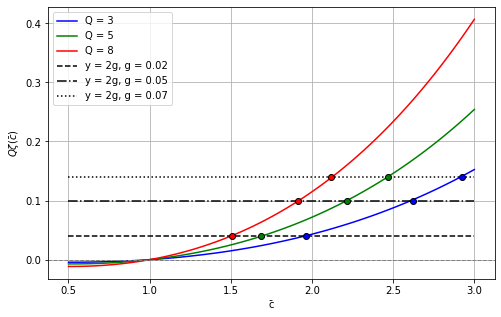

In [7]:
c_bar_values = np.linspace(0.5, 3, 100)

# Values for Q and g
Q_values = [3, 5, 8]
gas_values = [0.02, 0.05, 0.07]

# Colors for different Q values
colors = ['b', 'g', 'r']

# Plot settings
plt.figure(figsize=(8, 5))

# Set to track which gas values have already been plotted to avoid duplicates in the legend
plotted_gas_lines = set()

# Plot Qzeta values for each Q
for i, Q in enumerate(Q_values):
    # Calculate Qzeta_values for each c_bar and Q
    Qzeta_values = np.array([pi_F(Q, c_bar) + 2 * g for c_bar in c_bar_values])

    # Plot Qzeta for this Q
    plt.plot(c_bar_values, Qzeta_values, label=f'Q = {Q}', color=colors[i])

    # For each gas value, find the intersection points
    for gas in gas_values:
        y_value = 2 * gas  # Horizontal line at y = 2g
        
        # Find the index of the closest intersection point
        diff = np.abs(Qzeta_values - y_value)  # Calculate the difference between Qzeta and y_value
        intersection_idx = np.argmin(diff)  # Get the index with the minimum difference

        # Highlight the unique intersection point
        c_bar_intersection = c_bar_values[intersection_idx]
        plt.scatter(c_bar_intersection, y_value,  edgecolor='k',color=colors[i], zorder=5)

# Define different line styles for each gas value
line_styles = ['--', '-.', ':']

# Plot the horizontal lines for each gas value only once, with different styles
for i, gas in enumerate(gas_values):
    y_value = 2 * gas  # Horizontal line at y = 2g

    # Plot horizontal line with a distinct style for each gas value
    if gas not in plotted_gas_lines:
        plt.plot(c_bar_values, [y_value]*len(c_bar_values), linestyle=line_styles[i], label=f'y = 2g, g = {gas}', color='black')
        plotted_gas_lines.add(gas)

# Reference line at pi_F(Q) = 0
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.xlabel('c̄')
plt.ylabel(r'$Q\zeta(c̄)$')
plt.legend()
plt.grid()
plt.show()

In [8]:
def solve_f_in_aggregate_payoff(E):
    f_initial_guess = 0.5  # Initial guess for f
    f_solution = fsolve(total_payoff_two, f_initial_guess, args=(E, Q1, Q2, alpha_1, alpha_2))
    return f_solution[0] if f_solution.size > 0 else None

In [9]:
eta = 0.01
Q1 = 1
Q2 = 3
alpha_1 = 1
alpha_2 = 0.5

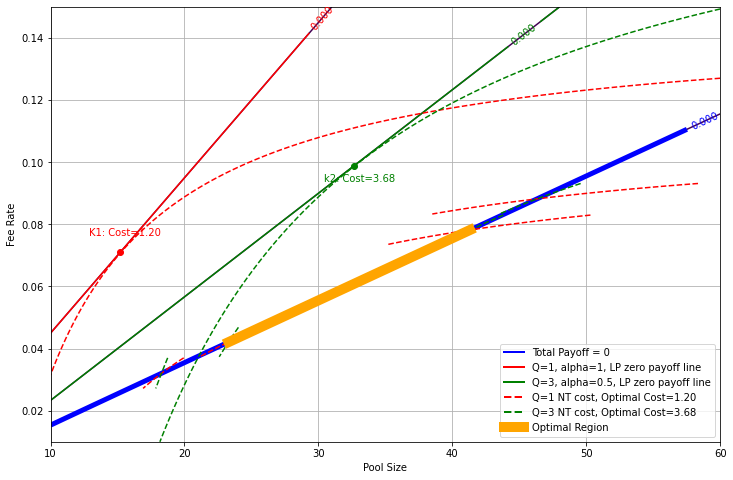

In [10]:
plt.figure(figsize=(12, 8))


# Create the fee rate and pool size values
f_values = np.linspace(0.01, 0.15, 400)  # f from 0.01 to 5
E_values = np.linspace(10, 60, 400)  

# Create a meshgrid
F, E = np.meshgrid(f_values, E_values)

Z1 = total_payoff_two (F,E,Q1,Q2,alpha_1,alpha_2)
Z2_payoff = LP_payoff(F, E, Q1,alpha_1)
Z3_payoff = LP_payoff(F, E, Q2,alpha_2)
Z2_cost = NT_cost(F, E, Q1)
Z3_cost = NT_cost(F, E, Q2)


f_zero2, E_zero2 = get_zero_payoff_points(Z2_payoff, F, E)
f_zero3, E_zero3 = get_zero_payoff_points(Z3_payoff, F, E)
# Find the minimum NT_cost points under the constraint for Z2_cost and Z3_cost
min_cost2, min_point2 = find_minimum_cost(f_zero2, E_zero2, Z2_cost)
min_cost3, min_point3 = find_minimum_cost(f_zero3, E_zero3, Z3_cost)


f_zero, E_zero = get_zero_payoff_points(Z1, F, E)

# Find the minimum NT_cost points under the constraint for Z1
min_cost21, min_point21 = find_minimum_cost(f_zero, E_zero, Z2_cost)
min_cost31, min_point31 = find_minimum_cost(f_zero, E_zero, Z3_cost)


contour1 = plt.contour(E, F, Z1, levels=[0], colors='blue', linewidths=5)  # Contour at Z=0
plt.clabel(contour1, inline=1, fontsize=10)

contour4 = plt.contour(E, F, Z2_payoff, levels=[0], colors='red')  # Contour at Z=0
plt.clabel(contour4, inline=1, fontsize=10)
contour5 = plt.contour(E, F, Z3_payoff, levels=[0], colors='green')  # Contour at Z=0
plt.clabel(contour5, inline=1, fontsize=10)


# Mark the optimal points on the plot
plt.plot(min_point21[1], min_point21[0], 'ro')
plt.plot(min_point31[1], min_point31[0], 'go')
x_line = np.linspace(min_point21[1], min_point31[1], 100)  
y_line = np.linspace(min_point21[0], min_point31[0], 100)  


plt.plot(x_line, y_line, 'orange', linewidth=10, label="Optimal Region")


# Mark the optimal points on the plot
plt.plot(min_point2[1], min_point2[0], 'ro', label=f'Optimal Point (Q={Q1}, Cost={min_cost2:.2f})')
plt.plot(min_point3[1], min_point3[0], 'go', label=f'Optimal Point (Q={Q2}, Cost={min_cost3:.2f})')




# Annotate the optimal points
plt.annotate(f'K1: Cost={min_cost2:.2f}', (min_point2[1], min_point2[0]), textcoords="offset points", xytext=(5, 16), ha='center', color='red')
plt.annotate(f'k2: Cost={min_cost3:.2f}', (min_point3[1], min_point3[0]), textcoords="offset points", xytext=(5, -16), ha='center', color='green')

# Plot the indifference curves for Z2_cost and Z3_cost
contour2 = plt.contour(E, F, Z2_cost, levels=[min_cost2], colors='red', linestyles='--')
contour3 = plt.contour(E, F, Z3_cost, levels=[
 min_cost3], colors='green', linestyles='--')



#contour21 = plt.contour(E, F, Z2_cost, levels=[min_cost21], colors='red', linestyles='--')
#contour31 = plt.contour(E, F, Z3_cost, levels=[min_cost31], colors='green', linestyles='--')




f_point_21 = min_point21[0]
f_point_31 = min_point31[0]
E_point_21 = min_point21[1]
E_point_31 = min_point31[1]

L_size  = E_point_21-5
H_size  =E_point_31+5
f_point_H = solve_f_in_aggregate_payoff(H_size)
f_point_L = solve_f_in_aggregate_payoff(L_size)
# Compute contour levels
level_H_Q1 = NT_cost(f_point_H, H_size, Q1)
level_H_Q2 = NT_cost(f_point_H, H_size, Q2)
level_L_Q1 = NT_cost(f_point_L, L_size, Q1)
level_L_Q2 = NT_cost(f_point_L, L_size, Q2)
level_21_Q1 = NT_cost(f_point_21, E_point_21, Q1)  # Assuming H_size is appropriate
level_21_Q2 = NT_cost(f_point_21,E_point_21, Q2)
level_31_Q1 = NT_cost(f_point_31, E_point_31, Q1)  # Assuming L_size is appropriate
level_31_Q2 = NT_cost(f_point_31, E_point_31, Q2)

# Define the range around f values
area_range = 0.005
f_min_H, f_max_H = f_point_H - area_range, f_point_H + area_range
f_min_L, f_max_L = f_point_L - area_range, f_point_L + area_range
f_min_21, f_max_21 = f_point_21 - area_range, f_point_21 + area_range
f_min_31, f_max_31 = f_point_31 - area_range, f_point_31 + area_range

# Create masks
mask_H = (F >= f_min_H) & (F <= f_max_H)
mask_L = (F >= f_min_L) & (F <= f_max_L)
mask_21 = (F >= f_min_21) & (F <= f_max_21)
mask_31 = (F >= f_min_31) & (F <= f_max_31)

# Plot contours with masked regions
plt.contour(E, F, np.where(mask_H, Z2_cost, np.nan), levels=[level_H_Q1], colors='red', linestyles='--')
plt.contour(E, F, np.where(mask_H, Z3_cost, np.nan), levels=[level_H_Q2], colors='green', linestyles='--')

plt.contour(E, F, np.where(mask_L, Z2_cost, np.nan), levels=[level_L_Q1], colors='red', linestyles='--')
plt.contour(E, F, np.where(mask_L, Z3_cost, np.nan), levels=[level_L_Q2], colors='green', linestyles='--')

plt.contour(E, F, np.where(mask_21, Z2_cost, np.nan), levels=[level_21_Q1], colors='red', linestyles='--')
plt.contour(E, F, np.where(mask_21, Z3_cost, np.nan), levels=[level_21_Q2], colors='green', linestyles='--')

plt.contour(E, F, np.where(mask_31, Z2_cost, np.nan), levels=[level_31_Q1], colors='red', linestyles='--')
plt.contour(E, F, np.where(mask_31, Z3_cost, np.nan), levels=[level_31_Q2], colors='green', linestyles='--')


# Add the legend
# Create proxy artists for the legend
legend_lines = [Line2D([0], [0], color='blue', lw=2, label='Total Payoff = 0'),
                     Line2D([0], [0], color='red', lw=2, linestyle='solid', label=f'Q={Q1}, alpha={alpha_1}, LP zero payoff line'),
                 Line2D([0], [0], color='green', lw=2, linestyle='solid', label=f'Q={Q2}, alpha={alpha_2}, LP zero payoff line'),
                Line2D([0], [0], color='red', lw=2, linestyle='--', label=f'Q={Q1} NT cost, Optimal Cost={min_cost2:.2f}'),
                Line2D([0], [0], color='green', lw=2, linestyle='--', label=f'Q={Q2} NT cost, Optimal Cost={min_cost3:.2f}'),
               Line2D([0], [0], color='orange', lw=10, label='Optimal Region') ]

plt.xlabel('Pool Size')
plt.ylabel('Fee Rate')

plt.grid(True)

# Add the legend
plt.legend(handles=legend_lines, loc='lower right')

In [11]:
def exgo_pi_F(f,E,Q,W):
    Q_w = W
    # First term: (1-f) * E * Q_w / [(E - Q_w - Q)(E - Q)]
    term1 = (1 - f) * E * Q_w / ((E - Q_w - Q) * (E - Q))
    # Second term: (1+f) * Q_w / (E - Q_w)
    term2 = (1 + f) * Q_w / (E - Q_w)
    # Compute the full expression: term1 - term2
    result = E*V*(term1 - term2)-2*g
    
    return result

def exgo_pi_F_with_c(f,E,Q,c_bar=1.5):
    Q_w = c_bar*Q
    # First term: (1-f) * E * Q_w / [(E - Q_w - Q)(E - Q)]
    term1 = (1 - f) * E * Q_w / ((E - Q_w - Q) * (E - Q))
    # Second term: (1+f) * Q_w / (E - Q_w)
    term2 = (1 + f) * Q_w / (E - Q_w)
    # Compute the full expression: term1 - term2
    result = E*V*(term1 - term2)-2*g
    
    return result

In [12]:
c_bar =2.6

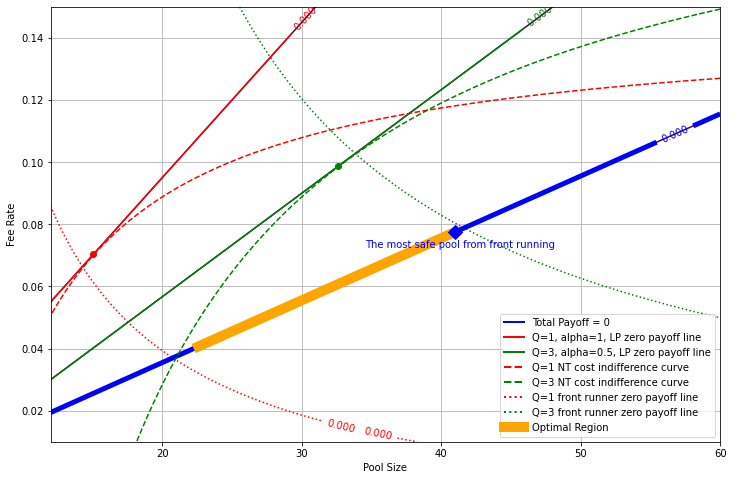

In [13]:
plt.figure(figsize=(12, 8))


# Create the fee rate and pool size values
f_values = np.linspace(0.01, 0.15, 400)  # f from 0.01 to 5
E_values = np.linspace(12, 60, 400)  

# Create a meshgrid
F, E = np.meshgrid(f_values, E_values)


front_run_payoff_Q1 = exgo_pi_F_with_c(F, E, Q1, c_bar)
front_run_payoff_Q2 = exgo_pi_F_with_c(F, E, Q2,c_bar)

Z1 = total_payoff_two (F,E,Q1,Q2,alpha_1,alpha_2)
Z2_payoff = LP_payoff(F, E, Q1,alpha_1)
Z3_payoff = LP_payoff(F, E, Q2,alpha_2)
Z2_cost = NT_cost(F, E, Q1)
Z3_cost = NT_cost(F, E, Q2)


f_zero2, E_zero2 = get_zero_payoff_points(Z2_payoff, F, E)
f_zero3, E_zero3 = get_zero_payoff_points(Z3_payoff, F, E)
# Find the minimum NT_cost points under the constraint for Z2_cost and Z3_cost
min_cost2, min_point2 = find_minimum_cost(f_zero2, E_zero2, Z2_cost)
min_cost3, min_point3 = find_minimum_cost(f_zero3, E_zero3, Z3_cost)


f_zero, E_zero = get_zero_payoff_points(Z1, F, E)

# Find the minimum NT_cost points under the constraint for Z1
min_cost21, min_point21 = find_minimum_cost(f_zero, E_zero, Z2_cost)
min_cost31, min_point31 = find_minimum_cost(f_zero, E_zero, Z3_cost)


contour1fr=plt.contour(E, F, front_run_payoff_Q1 , levels=[0], colors='red',linestyles='dotted')  # Contour at Z=0
plt.clabel(contour1fr, inline=1, fontsize=10)

contour2fr=plt.contour(E, F, front_run_payoff_Q2 , levels=[0], colors='green',linestyles='dotted')  # Contour at Z=0
plt.clabel(contour1fr, inline=1, fontsize=10)


contour1 = plt.contour(E, F, Z1, levels=[0], colors='blue', linewidths=5)  # Contour at Z=0
plt.clabel(contour1, inline=1, fontsize=10)

contour4 = plt.contour(E, F, Z2_payoff, levels=[0], colors='red')  # Contour at Z=0
plt.clabel(contour4, inline=1, fontsize=10)
contour5 = plt.contour(E, F, Z3_payoff, levels=[0], colors='green')  # Contour at Z=0
plt.clabel(contour5, inline=1, fontsize=10)


# Mark the optimal points on the plot
plt.plot(min_point21[1], min_point21[0], 'ro')
plt.plot(min_point31[1], min_point31[0], 'go')
x_line = np.linspace(min_point21[1], min_point31[1], 100)  
y_line = np.linspace(min_point21[0], min_point31[0], 100)  


plt.plot(x_line, y_line, 'orange', linewidth=10, label="Optimal Region")


# Mark the optimal points on the plot
plt.plot(min_point2[1], min_point2[0], 'ro', label=f'Optimal Point (Q={Q1}, Cost={min_cost2:.2f})')
plt.plot(min_point3[1], min_point3[0], 'go', label=f'Optimal Point (Q={Q2}, Cost={min_cost3:.2f})')
plt.plot(min_point31[1], min_point31[0], 'bD', markersize=10)


# Annotate the optimal points
plt.annotate(f'The most safe pool from front running', (min_point31[1], min_point31[0]), textcoords="offset points", xytext=(5, -16), ha='center', color='blue')


# Plot the indifference curves for Z2_cost and Z3_cost
contour2 = plt.contour(E, F, Z2_cost, levels=[min_cost2], colors='red', linestyles='--')
contour3 = plt.contour(E, F, Z3_cost, levels=[
 min_cost3], colors='green', linestyles='--')




'''f_point_21 = min_point21[0]
f_point_31 = min_point31[0]
E_point_21 = min_point21[1]
E_point_31 = min_point31[1]



# Define the range around f values
area_range = 0.005
f_min_21, f_max_21 = f_point_21 - area_range, f_point_21 + area_range
f_min_31, f_max_31 = f_point_31 - area_range, f_point_31 + area_range

# Create masks
mask_21 = (F >= f_min_21) & (F <= f_max_21)
mask_31 = (F >= f_min_31) & (F <= f_max_31)

plt.contour(E, F, np.where(mask_21, Z2_cost, np.nan), levels=[level_21_Q1], colors='red', linestyles='--')
plt.contour(E, F, np.where(mask_21, Z3_cost, np.nan), levels=[level_21_Q2], colors='green', linestyles='--')

plt.contour(E, F, np.where(mask_31, Z2_cost, np.nan), levels=[level_31_Q1], colors='red', linestyles='--')
plt.contour(E, F, np.where(mask_31, Z3_cost, np.nan), levels=[level_31_Q2], colors='green', linestyles='--')'''



# Add the legend
# Create proxy artists for the legend
legend_lines = [Line2D([0], [0], color='blue', lw=2, label='Total Payoff = 0'),
                 Line2D([0], [0], color='red', lw=2, linestyle='solid', label=f'Q={Q1}, alpha={alpha_1}, LP zero payoff line'),
                 Line2D([0], [0], color='green', lw=2, linestyle='solid', label=f'Q={Q2}, alpha={alpha_2}, LP zero payoff line'),
                Line2D([0], [0], color='red', lw=2, linestyle='--', label=f'Q={Q1} NT cost indifference curve'),
                Line2D([0], [0], color='green', lw=2, linestyle='--', label=f'Q={Q2} NT cost indifference curve'),
                 Line2D([0], [0], color='red', lw=2, linestyle='dotted', label=f'Q={Q1} front runner zero payoff line'),
                  Line2D([0], [0], color='green', lw=2, linestyle='dotted', label=f'Q={Q2} front runner zero payoff line'),
               Line2D([0], [0], color='orange', lw=10, label='Optimal Region') ]

plt.xlabel('Pool Size')
plt.ylabel('Fee Rate')

plt.grid(True)

# Add the legend
plt.legend(handles=legend_lines, loc='lower right')

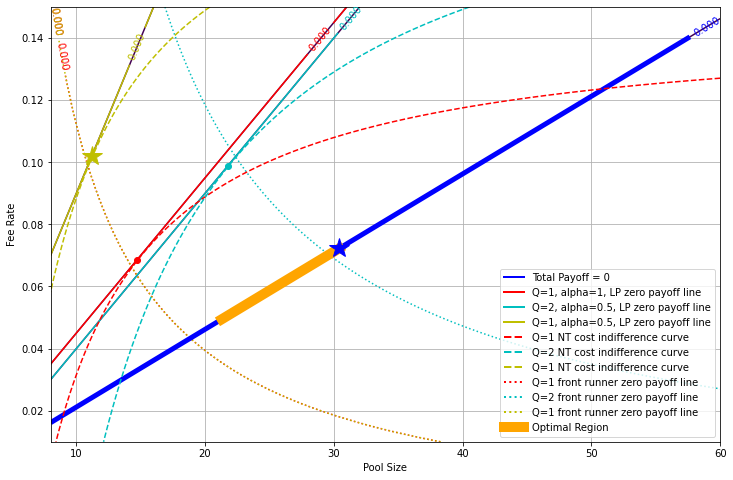

In [14]:
Q2_prime = 2
Q2_primeprime = Q2-Q2_prime
plt.figure(figsize=(12, 8))


# Create the fee rate and pool size values
f_values = np.linspace(0.01, 0.15, 400)  # f from 0.01 to 5
E_values = np.linspace(8, 60, 400)  

# Create a meshgrid
F, E = np.meshgrid(f_values, E_values)


front_run_payoff_Q1 = exgo_pi_F_with_c(F, E, Q1, c_bar)
front_run_payoff_Q2_prime = exgo_pi_F_with_c(F, E, Q2_prime,c_bar)
front_run_payoff_Q2_primeprime = exgo_pi_F_with_c(F, E, Q2_primeprime,c_bar)

Z1 = total_payoff_two (F,E,Q1,Q2_prime,alpha_1,alpha_2)
Z2_payoff = LP_payoff(F, E, Q1,alpha_1)
Z3_payoff = LP_payoff(F, E, Q2_prime,alpha_2)
Z4_payoff = LP_payoff(F, E, Q2_primeprime,alpha_2)
Z2_cost = NT_cost(F, E, Q1)
Z3_cost = NT_cost(F, E, Q2_prime)
Z4_cost = NT_cost(F, E, Q2_primeprime)

f_zero2, E_zero2 = get_zero_payoff_points(Z2_payoff, F, E)
f_zero3, E_zero3 = get_zero_payoff_points(Z3_payoff, F, E)
f_zero4, E_zero4 = get_zero_payoff_points(Z4_payoff, F, E)
# Find the minimum NT_cost points under the constraint for Z2_cost and Z3_cost
min_cost2, min_point2 = find_minimum_cost(f_zero2, E_zero2, Z2_cost)
min_cost3, min_point3 = find_minimum_cost(f_zero3, E_zero3, Z3_cost)
min_cost4, min_point4 = find_minimum_cost(f_zero4, E_zero4, Z4_cost)

f_zero, E_zero = get_zero_payoff_points(Z1, F, E)

# Find the minimum NT_cost points under the constraint for Z1
min_cost21, min_point21 = find_minimum_cost(f_zero, E_zero, Z2_cost)
min_cost31, min_point31 = find_minimum_cost(f_zero, E_zero, Z3_cost)


contour1fr=plt.contour(E, F, front_run_payoff_Q1 , levels=[0], colors='red',linestyles='dotted')  # Contour at Z=0
plt.clabel(contour1fr, inline=1, fontsize=10)

contour2fr=plt.contour(E, F, front_run_payoff_Q2_prime, levels=[0], colors='c',linestyles='dotted')  # Contour at Z=0
plt.clabel(contour1fr, inline=1, fontsize=10)

contour3fr=plt.contour(E, F, front_run_payoff_Q2_primeprime, levels=[0], colors='y',linestyles='dotted')  # Contour at Z=0
plt.clabel(contour3fr, inline=1, fontsize=10)


contour1 = plt.contour(E, F, Z1, levels=[0], colors='blue', linewidths=5)  # Contour at Z=0
plt.clabel(contour1, inline=1, fontsize=10)

contour4 = plt.contour(E, F, Z2_payoff, levels=[0], colors='red')  # Contour at Z=0
plt.clabel(contour4, inline=1, fontsize=10)
contour5 = plt.contour(E, F, Z3_payoff, levels=[0], colors='c')  # Contour at Z=0
plt.clabel(contour5, inline=1, fontsize=10)

contour6 = plt.contour(E, F, Z4_payoff, levels=[0], colors='y')  # Contour at Z=0
plt.clabel(contour6, inline=1, fontsize=10)


# Mark the optimal points on the plot
plt.plot(min_point21[1], min_point21[0], 'ro')
plt.plot(min_point31[1], min_point31[0], 'co')
x_line = np.linspace(min_point21[1], min_point31[1], 100)  
y_line = np.linspace(min_point21[0], min_point31[0], 100)  


plt.plot(x_line, y_line, 'orange', linewidth=10, label="Optimal Region")


# Mark the optimal points on the plot
plt.plot(min_point2[1], min_point2[0], 'ro', label=f'Optimal Point (Q={Q1}, Cost={min_cost2:.2f})')
plt.plot(min_point3[1], min_point3[0], 'co', label=f'Optimal Point (Q={Q2_prime}, Cost={min_cost3:.2f})')
plt.plot(min_point4[1], min_point4[0], 'y*', label=f'Optimal Point (Q={Q2_primeprime}, Cost={min_cost4:.2f})', markersize=20)
plt.plot(min_point31[1], min_point31[0], 'b*', markersize=20)



# Plot the indifference curves for Z2_cost and Z3_cost
contour2 = plt.contour(E, F, Z2_cost, levels=[min_cost2], colors='red', linestyles='--')
contour3 = plt.contour(E, F, Z3_cost, levels=[
 min_cost3], colors='c', linestyles='--')
contour7 = plt.contour(E, F, Z4_cost, levels=[
 min_cost4], colors='y', linestyles='--')


#contour21 = plt.contour(E, F, Z2_cost, levels=[min_cost21], colors='red', linestyles='--')
#contour31 = plt.contour(E, F, Z3_cost, levels=[min_cost31], colors='green', linestyles='--')



# Add the legend
# Create proxy artists for the legend
legend_lines = [Line2D([0], [0], color='blue', lw=2, label='Total Payoff = 0'),
                 Line2D([0], [0], color='red', lw=2, linestyle='solid', label=f'Q={Q1}, alpha={alpha_1}, LP zero payoff line'),
                 Line2D([0], [0], color='c', lw=2, linestyle='solid', label=f'Q={Q2_prime}, alpha={alpha_2}, LP zero payoff line'),
                  Line2D([0], [0], color='y', lw=2, linestyle='solid', label=f'Q={Q2_primeprime}, alpha={alpha_2}, LP zero payoff line'),
                Line2D([0], [0], color='red', lw=2, linestyle='--', label=f'Q={Q1} NT cost indifference curve'),
                Line2D([0], [0], color='c', lw=2, linestyle='--', label=f'Q={Q2_prime} NT cost indifference curve'),
                Line2D([0], [0], color='y', lw=2, linestyle='--', label=f'Q={Q2_primeprime} NT cost indifference curve'),
                Line2D([0], [0], color='red', lw=2, linestyle='dotted', label=f'Q={Q1} front runner zero payoff line'),
                  Line2D([0], [0], color='c', lw=2, linestyle='dotted', label=f'Q={Q2_prime} front runner zero payoff line'),
                    Line2D([0], [0], color='y', lw=2, linestyle='dotted', label=f'Q={Q2_primeprime} front runner zero payoff line'),   
               Line2D([0], [0], color='orange', lw=10, label='Optimal Region') ]




plt.xlabel('Pool Size')
plt.ylabel('Fee Rate')

plt.grid(True)

# Add the legend
plt.legend(handles=legend_lines, loc='lower right')

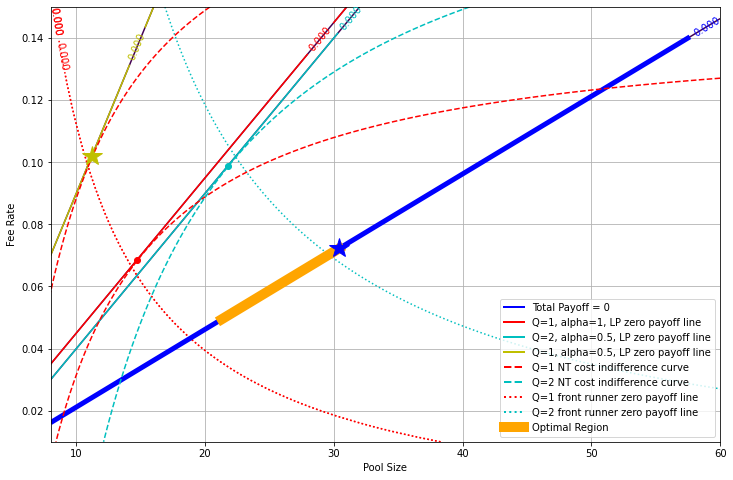

In [15]:
Q2_prime = 2
Q2_primeprime = Q2-Q2_prime
plt.figure(figsize=(12, 8))


# Create the fee rate and pool size values
f_values = np.linspace(0.01, 0.15, 400)  # f from 0.01 to 5
E_values = np.linspace(8, 60, 400)  

# Create a meshgrid
F, E = np.meshgrid(f_values, E_values)


front_run_payoff_Q1 = exgo_pi_F_with_c(F, E, Q1, c_bar)
front_run_payoff_Q2_prime = exgo_pi_F_with_c(F, E, Q2_prime,c_bar)
front_run_payoff_Q2_primeprime = exgo_pi_F_with_c(F, E, Q2_primeprime,c_bar)

Z1 = total_payoff_two (F,E,Q1,Q2_prime,alpha_1,alpha_2)
Z2_payoff = LP_payoff(F, E, Q1,alpha_1)
Z3_payoff = LP_payoff(F, E, Q2_prime,alpha_2)
Z4_payoff = LP_payoff(F, E, Q2_primeprime,alpha_2)
Z2_cost = NT_cost(F, E, Q1)
Z3_cost = NT_cost(F, E, Q2_prime)
Z4_cost = NT_cost(F, E, Q2_primeprime)

f_zero2, E_zero2 = get_zero_payoff_points(Z2_payoff, F, E)
f_zero3, E_zero3 = get_zero_payoff_points(Z3_payoff, F, E)
f_zero4, E_zero4 = get_zero_payoff_points(Z4_payoff, F, E)
# Find the minimum NT_cost points under the constraint for Z2_cost and Z3_cost
min_cost2, min_point2 = find_minimum_cost(f_zero2, E_zero2, Z2_cost)
min_cost3, min_point3 = find_minimum_cost(f_zero3, E_zero3, Z3_cost)
min_cost4, min_point4 = find_minimum_cost(f_zero4, E_zero4, Z4_cost)

f_zero, E_zero = get_zero_payoff_points(Z1, F, E)

# Find the minimum NT_cost points under the constraint for Z1
min_cost21, min_point21 = find_minimum_cost(f_zero, E_zero, Z2_cost)
min_cost31, min_point31 = find_minimum_cost(f_zero, E_zero, Z3_cost)


contour1fr=plt.contour(E, F, front_run_payoff_Q1 , levels=[0], colors='red',linestyles='dotted')  # Contour at Z=0
plt.clabel(contour1fr, inline=1, fontsize=10)

contour2fr=plt.contour(E, F, front_run_payoff_Q2_prime, levels=[0], colors='c',linestyles='dotted')  # Contour at Z=0
plt.clabel(contour1fr, inline=1, fontsize=10)

contour3fr=plt.contour(E, F, front_run_payoff_Q2_primeprime, levels=[0], colors='red',linestyles='dotted')  # Contour at Z=0
plt.clabel(contour3fr, inline=1, fontsize=10)


contour1 = plt.contour(E, F, Z1, levels=[0], colors='blue', linewidths=5)  # Contour at Z=0
plt.clabel(contour1, inline=1, fontsize=10)

contour4 = plt.contour(E, F, Z2_payoff, levels=[0], colors='red')  # Contour at Z=0
plt.clabel(contour4, inline=1, fontsize=10)
contour5 = plt.contour(E, F, Z3_payoff, levels=[0], colors='c')  # Contour at Z=0
plt.clabel(contour5, inline=1, fontsize=10)

contour6 = plt.contour(E, F, Z4_payoff, levels=[0], colors='y')  # Contour at Z=0
plt.clabel(contour6, inline=1, fontsize=10)


# Mark the optimal points on the plot
plt.plot(min_point21[1], min_point21[0], 'ro')
plt.plot(min_point31[1], min_point31[0], 'co')
x_line = np.linspace(min_point21[1], min_point31[1], 100)  
y_line = np.linspace(min_point21[0], min_point31[0], 100)  


plt.plot(x_line, y_line, 'orange', linewidth=10, label="Optimal Region")


# Mark the optimal points on the plot
plt.plot(min_point2[1], min_point2[0], 'ro', label=f'Optimal Point (Q={Q1}, Cost={min_cost2:.2f})')
plt.plot(min_point3[1], min_point3[0], 'co', label=f'Optimal Point (Q={Q2_prime}, Cost={min_cost3:.2f})')
plt.plot(min_point4[1], min_point4[0], 'y*', label=f'Optimal Point (Q={Q2_primeprime}, Cost={min_cost4:.2f})', markersize=20)
plt.plot(min_point31[1], min_point31[0], 'b*', markersize=20)



# Plot the indifference curves for Z2_cost and Z3_cost
contour2 = plt.contour(E, F, Z2_cost, levels=[min_cost2], colors='red', linestyles='--')
contour3 = plt.contour(E, F, Z3_cost, levels=[
 min_cost3], colors='c', linestyles='--')
contour7 = plt.contour(E, F, Z4_cost, levels=[
 min_cost4], colors='red', linestyles='--')


#contour21 = plt.contour(E, F, Z2_cost, levels=[min_cost21], colors='red', linestyles='--')
#contour31 = plt.contour(E, F, Z3_cost, levels=[min_cost31], colors='green', linestyles='--')



# Add the legend
# Create proxy artists for the legend
legend_lines = [Line2D([0], [0], color='blue', lw=2, label='Total Payoff = 0'),
                 Line2D([0], [0], color='red', lw=2, linestyle='solid', label=f'Q={Q1}, alpha={alpha_1}, LP zero payoff line'),
                 Line2D([0], [0], color='c', lw=2, linestyle='solid', label=f'Q={Q2_prime}, alpha={alpha_2}, LP zero payoff line'),
                  Line2D([0], [0], color='y', lw=2, linestyle='solid', label=f'Q={Q2_primeprime}, alpha={alpha_2}, LP zero payoff line'),
                Line2D([0], [0], color='red', lw=2, linestyle='--', label=f'Q={Q1} NT cost indifference curve'),
                Line2D([0], [0], color='c', lw=2, linestyle='--', label=f'Q={Q2_prime} NT cost indifference curve'),
                Line2D([0], [0], color='red', lw=2, linestyle='dotted', label=f'Q={Q1} front runner zero payoff line'),
                  Line2D([0], [0], color='c', lw=2, linestyle='dotted', label=f'Q={Q2_prime} front runner zero payoff line'),
               Line2D([0], [0], color='orange', lw=10, label='Optimal Region') ]




plt.xlabel('Pool Size')
plt.ylabel('Fee Rate')

plt.grid(True)

# Add the legend
plt.legend(handles=legend_lines, loc='lower right')